Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

In [3]:
df

array([[  1. ,  85. ,  26.6,  31. ,   0. ],
       [  1. ,  89. ,  28.1,  21. ,   0. ],
       [  5. , 116. ,  25.6,  30. ,   0. ],
       ...,
       [ 13. , 104. ,  31.2,  38. ,   1. ],
       [  4. , 156. ,  48.3,  32. ,   1. ],
       [  7. , 160. ,  30.5,  39. ,   1. ]])

Splitting the dataset

In [4]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [5]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

Build the Keras Model

In [6]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 5 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 10ms/step - loss: 0.6647 - accuracy: 0.6915 - val_loss: 0.6147 - val_accuracy: 0.7136
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7599 - val_loss: 0.5368 - val_accuracy: 0.7045
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7857 - val_loss: 0.5180 - val_accuracy: 0.7182
Epoch 4/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7766 - val_loss: 0.5073 - val_accuracy: 0.7545
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7964 - val_loss: 0.5050 - val_accuracy: 0.7364
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7948 - val_loss: 0.5043 - val_accuracy: 0.7182
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.7933 - val_loss: 0.4896 - val_accuracy: 0.7727
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9179 - val_loss: 0.6349 - val_accuracy: 0.8227
Epoch 60/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9225 - val_loss: 0.6390 - val_accuracy: 0.7818
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8982 - val_loss: 0.5845 - val_accuracy: 0.8273
Epoch 62/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9119 - val_loss: 0.6115 - val_accuracy: 0.8091
Epoch 63/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9103 - val_loss: 0.6147 - val_accuracy: 0.8182
Epoch 64/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9225 - val_loss: 0.6237 - val_accuracy: 0.8000
Epoch 65/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9164 - val_loss: 0.6697 - val_accuracy: 0.7955
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9590 - val_loss: 0.9022 - val_accuracy: 0.8318
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9590 - val_loss: 1.0130 - val_accuracy: 0.8455
Epoch 118/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9711 - val_loss: 0.9910 - val_accuracy: 0.8500
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9650 - val_loss: 1.1082 - val_accuracy: 0.8136
Epoch 120/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9605 - val_loss: 0.9841 - val_accuracy: 0.8455
Epoch 121/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9666 - val_loss: 1.0576 - val_accuracy: 0.8318
Epoch 122/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9696 - val_loss: 1.0495 - val_accuracy: 0.8273
Epoch 123/150

In [7]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9878
Training Accuracy: 98.78
7/7 [==============================] - 0s 2ms/step - loss: 1.2072 - accuracy: 0.8500
Validation Accuracy: 85.00


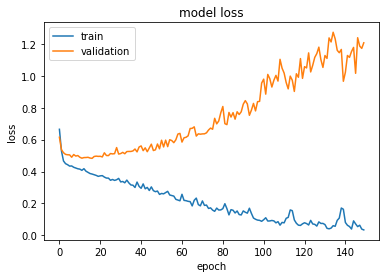

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 4 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 13ms/step - loss: 0.6531 - accuracy: 0.5593 - val_loss: 0.6316 - val_accuracy: 0.6818
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.7386 - val_loss: 0.6149 - val_accuracy: 0.7409
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7584 - val_loss: 0.6109 - val_accuracy: 0.7273
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7827 - val_loss: 0.6062 - val_accuracy: 0.7318
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7903 - val_loss: 0.6015 - val_accuracy: 0.7409
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7857 - val_loss: 0.5990 - val_accuracy: 0.7318
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7948 - val_loss: 0.5939 - val_accuracy: 0.7273
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.9103 - val_loss: 0.5435 - val_accuracy: 0.8045
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9179 - val_loss: 0.5333 - val_accuracy: 0.8091
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9149 - val_loss: 0.5547 - val_accuracy: 0.8000
Epoch 62/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.9179 - val_loss: 0.5828 - val_accuracy: 0.7955
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9164 - val_loss: 0.5411 - val_accuracy: 0.8000
Epoch 64/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9088 - val_loss: 0.5282 - val_accuracy: 0.8000
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9210 - val_loss: 0.5879 - val_accuracy: 0.7955
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9164 - val_loss: 0.7172 - val_accuracy: 0.8000
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9195 - val_loss: 0.7620 - val_accuracy: 0.8000
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.9134 - val_loss: 0.7555 - val_accuracy: 0.7955
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9195 - val_loss: 0.6436 - val_accuracy: 0.7955
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9286 - val_loss: 0.7345 - val_accuracy: 0.8045
Epoch 121/150
42/42 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9438 - val_loss: 0.7878 - val_accuracy: 0.8091
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9483 - val_loss: 0.6948 - val_accuracy: 0.8136
Epoch 123/150

In [10]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 949us/step - loss: 0.1646 - accuracy: 0.9559
Training Accuracy: 95.59
7/7 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.8000
Validation Accuracy: 80.00


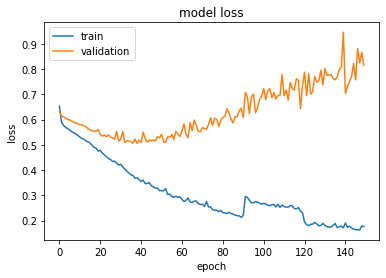

In [11]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 3 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 8ms/step - loss: 0.6224 - accuracy: 0.7325 - val_loss: 0.6014 - val_accuracy: 0.7045
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7614 - val_loss: 0.5521 - val_accuracy: 0.7045
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7781 - val_loss: 0.5325 - val_accuracy: 0.7045
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7736 - val_loss: 0.5217 - val_accuracy: 0.7000
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7766 - val_loss: 0.5142 - val_accuracy: 0.7091
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7736 - val_loss: 0.5111 - val_accuracy: 0.7091
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7796 - val_loss: 0.5071 - val_accuracy: 0.7091
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8708 - val_loss: 0.4880 - val_accuracy: 0.7818
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8723 - val_loss: 0.4721 - val_accuracy: 0.7955
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8663 - val_loss: 0.4914 - val_accuracy: 0.7955
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8617 - val_loss: 0.4699 - val_accuracy: 0.7909
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8663 - val_loss: 0.4803 - val_accuracy: 0.8000
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8693 - val_loss: 0.4799 - val_accuracy: 0.8136
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8769 - val_loss: 0.4828 - val_accuracy: 0.8136
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9240 - val_loss: 0.5776 - val_accuracy: 0.8136
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9179 - val_loss: 0.5859 - val_accuracy: 0.8045
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9225 - val_loss: 0.5809 - val_accuracy: 0.8091
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9240 - val_loss: 0.5999 - val_accuracy: 0.7955
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9210 - val_loss: 0.5831 - val_accuracy: 0.8045
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9225 - val_loss: 0.5807 - val_accuracy: 0.8227
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9271 - val_loss: 0.5799 - val_accuracy: 0.8045
Epoch 123/150

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9392
Training Accuracy: 93.92
7/7 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.8045
Validation Accuracy: 80.45


In [14]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 2 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.6806 - accuracy: 0.6155 - val_loss: 0.6763 - val_accuracy: 0.6455
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7158 - val_loss: 0.6485 - val_accuracy: 0.7045
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7447 - val_loss: 0.6124 - val_accuracy: 0.7182
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7736 - val_loss: 0.5812 - val_accuracy: 0.7045
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7720 - val_loss: 0.5644 - val_accuracy: 0.7000
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7690 - val_loss: 0.5517 - val_accuracy: 0.7091
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7690 - val_loss: 0.5437 - val_accuracy: 0.7091
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8298 - val_loss: 0.4890 - val_accuracy: 0.7818
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8207 - val_loss: 0.4881 - val_accuracy: 0.7909
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8328 - val_loss: 0.4893 - val_accuracy: 0.7909
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8267 - val_loss: 0.4907 - val_accuracy: 0.7955
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8419 - val_loss: 0.4953 - val_accuracy: 0.7818
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8328 - val_loss: 0.4935 - val_accuracy: 0.8000
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8404 - val_loss: 0.4955 - val_accuracy: 0.8000
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8526 - val_loss: 0.5522 - val_accuracy: 0.7909
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8495 - val_loss: 0.5540 - val_accuracy: 0.7955
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8556 - val_loss: 0.5536 - val_accuracy: 0.7909
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8465 - val_loss: 0.5531 - val_accuracy: 0.7909
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8556 - val_loss: 0.5611 - val_accuracy: 0.8000
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8556 - val_loss: 0.5590 - val_accuracy: 0.7955
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8495 - val_loss: 0.5597 - val_accuracy: 0.7955
Epoch 123/150

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8541
Training Accuracy: 85.41
7/7 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7864
Validation Accuracy: 78.64


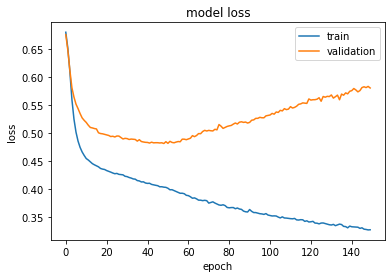

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 1 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 5ms/step - loss: 0.7413 - accuracy: 0.4650 - val_loss: 0.7056 - val_accuracy: 0.5455
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5182 - val_loss: 0.6810 - val_accuracy: 0.6364
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6702 - val_loss: 0.6597 - val_accuracy: 0.7182
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7538 - val_loss: 0.6365 - val_accuracy: 0.7455
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7614 - val_loss: 0.6149 - val_accuracy: 0.7227
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7766 - val_loss: 0.5916 - val_accuracy: 0.7318
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7720 - val_loss: 0.5695 - val_accuracy: 0.7000
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8055 - val_loss: 0.5007 - val_accuracy: 0.7227
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8040 - val_loss: 0.5008 - val_accuracy: 0.7273
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8085 - val_loss: 0.4995 - val_accuracy: 0.7227
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8070 - val_loss: 0.5004 - val_accuracy: 0.7273
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8085 - val_loss: 0.4996 - val_accuracy: 0.7318
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8055 - val_loss: 0.4992 - val_accuracy: 0.7273
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8085 - val_loss: 0.4988 - val_accuracy: 0.7318
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8374 - val_loss: 0.4914 - val_accuracy: 0.7273
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8359 - val_loss: 0.4915 - val_accuracy: 0.7273
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8374 - val_loss: 0.4914 - val_accuracy: 0.7273
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8419 - val_loss: 0.4923 - val_accuracy: 0.7273
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8389 - val_loss: 0.4922 - val_accuracy: 0.7318
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8374 - val_loss: 0.4924 - val_accuracy: 0.7273
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8359 - val_loss: 0.4906 - val_accuracy: 0.7227
Epoch 123/150

In [19]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8404
Training Accuracy: 84.04
7/7 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7364
Validation Accuracy: 73.64


In [20]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# NO hidden layers
# define the keras model
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.7745 - accuracy: 0.3845 - val_loss: 0.7829 - val_accuracy: 0.4227
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.4392 - val_loss: 0.7586 - val_accuracy: 0.4545
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.5046 - val_loss: 0.7373 - val_accuracy: 0.4818
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5486 - val_loss: 0.7189 - val_accuracy: 0.5091
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5927 - val_loss: 0.7042 - val_accuracy: 0.5455
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6201 - val_loss: 0.6903 - val_accuracy: 0.5864
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6565 - val_loss: 0.6782 - val_accuracy: 0.5955
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7720 - val_loss: 0.5188 - val_accuracy: 0.7318
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7690 - val_loss: 0.5182 - val_accuracy: 0.7318
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7705 - val_loss: 0.5178 - val_accuracy: 0.7364
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7705 - val_loss: 0.5176 - val_accuracy: 0.7318
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7690 - val_loss: 0.5172 - val_accuracy: 0.7318
Epoch 64/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7720 - val_loss: 0.5169 - val_accuracy: 0.7318
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7690 - val_loss: 0.5167 - val_accuracy: 0.7318
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7827 - val_loss: 0.5097 - val_accuracy: 0.7182
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7827 - val_loss: 0.5099 - val_accuracy: 0.7182
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7827 - val_loss: 0.5097 - val_accuracy: 0.7182
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7842 - val_loss: 0.5099 - val_accuracy: 0.7182
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7842 - val_loss: 0.5098 - val_accuracy: 0.7182
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7827 - val_loss: 0.5095 - val_accuracy: 0.7182
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7842 - val_loss: 0.5095 - val_accuracy: 0.7136
Epoch 123/150

In [22]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7827
Training Accuracy: 78.27
7/7 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7182
Validation Accuracy: 71.82


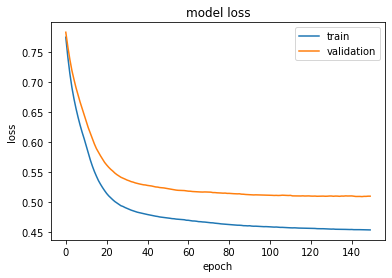

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()